In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression

# Load Data

In [2]:
data = load_breast_cancer()
X = data['data']
y = data['target']

# Fit Regression Model

In [3]:
lmod = LinearRegression().fit(X,y)

# Calulate Prediction

In [4]:
y_pred = lmod.predict(X)

# Calculate Residuals

In [5]:
residuals = y - y_pred

<AxesSubplot:>

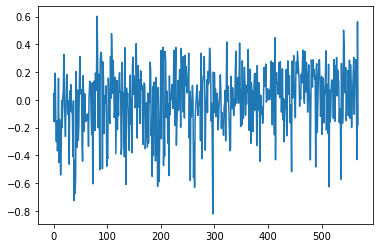

In [6]:
pd.Series(residuals).plot()

# Calculate Breusch - Pagan

$H_{0}$: Homoscedasticity is present | <ins> Error variances are equal <ins/>

$H_{a}$: Homoscedasticity is not present | <ins> Has heteroscedasticity - should transform data <ins/>

In [7]:
ones = pd.Series( np.ones( len(X) ))
exog_data = pd.concat( [ones, pd.DataFrame(X)], axis=1 )
test = sms.het_breuschpagan(residuals, exog_data)
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

results = pd.DataFrame(  list(zip(names, test)), columns=['names','value'])
results

,names,value
0,Lagrange multiplier statistic,63.501579
1,p-value,0.000340
2,f-value,2.252816
3,f p-value,0.000201


In [8]:
def test_breuschpagan(X, y, alpha=0.05):
    lmod = LinearRegression().fit(X,y)
    y_pred = lmod.predict(X)
    residuals = y - y_pred
    ones = pd.Series( np.ones( len(X) ))
    exog_data = pd.concat( [ones, pd.DataFrame(X)], axis=1 )
    test = sms.het_breuschpagan(residuals, exog_data)
    names = ['Lagrange multiplier statistic', 'p-value',
            'f-value', 'f p-value']

    results = pd.DataFrame(  list(zip(names, test)), columns=['names','value'])
    p = results[results['names']=='p-value']['value'].iloc[0]
    p = round(p, 4)
    if p<alpha:
        print(f'heteroscedasticity - should transform data. p = {p}')
    else:
        print(f'did not find heteroscedasticity - data should be fine. p = {p}')

In [9]:
test_breuschpagan(X, y)

heteroscedasticity - should transform data. p = 0.0003


# Calculate Mclead Li

Not available in python